# Fases de Treinamento e Validação dos Modelos

> O problema apresentado é do tipo Classificação, busca-se separar os dados de teste nas classes >50K e <=50K.

> Para solucionar o problema da previsão dos salários, eu utilizei todos os atributos da base, tirando o rótulo, e realizei uma etapa de pré-processamento, que transformou os dados da base. Inicialmente eu dividi a base "wage_train" em duas, base de treino (80%) e base de validação (20%), pois assim consegueria medir a performace dos modelos. 

> Nesses dados eu realizei 3 transformações, o primeiro foi o LabelEnconder, que basicamente converte os atributos categoricos (workclass, education, marital_status, occupation, relationship, race, sex e native_country) em números, pois os modelos não trabalham com strings nesses categorias. 

> O segundo foi o OneHotEnconder, que basicamente pega esses atributos que eram categoricos, e converte em um array onde fica 1 na coluna que representa aquela categoria, e 0 nas outras colunas, esse pré-processamento serve para os modelos não "darem pesos" diferentes para categorias com números diferentes, se for 0 para categoria_X e 1 para categoria_Y, o modelo poderia achar que o categoria_Y é mais importante por ser maior, ou vice-versa. 

> O terceiro foi o Escalonamento dos dados, todos os valores na mesma escala, o que pode melhorar os resultados de alguns modelos. 

> Para este problema eu utilizei os algoritmos de aprendizagem de máquina: Árvore de Descisão, KNN, Naive Bayes, Random Forest, Regressão Logística e SVM. Apliquei os mesmos dados de treinamento para cada modelo, e analisei os resultados na fase de validação.

> Para medir a performance dos modelos, utilizei as métricas: Acurácia, Precisão e Recall, além de utilizar a Matriz de Confusão para análise dos resultados. Utilizar todas essas métricas em conjunto, faz a análise ser menos influenciada pelo desbalanceamento das classes da base.

> Para os experimentos que eu realizei, o melhor resultado na fase de validação foi com o modelo Random Forest, este trouxe os maiores valores para as 3 métricas de performance. Acurácia: 0,85; Precisão: 0,80; Recall: 0,77. Por isso, esse foi o modelo escolhido. 

> Uma das características do Random Forest, é que ele é um conjunto de árvores de descisão, por um lado, isso é um pró pois trás o melhor resultado em conjunto do que se utilizasse apenas uma árvore, mas por outro lado, isso não um contra, pois utiliza mais processamento do que uma simples árvore de descisão, apesar disso, ainda utiliza menos processamento do que outros modelos, como o SVM. 


## Bibliotecas

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np

## Carregando a Base

In [2]:
df = pd.read_csv('wage_train.csv')
df = df.drop(columns=['Unnamed: 0'])

## Funções Auxiliares

In [3]:
def avaliacao(rotulos_validacao, rotulos_previstos, modelo):

    print(f'Acurácia: {accuracy_score(rotulos_validacao, rotulos_previstos)}')
    print(f"Precisão: {precision_score(rotulos_validacao, rotulos_previstos, average='macro')}")
    print(f"Recall: {recall_score(rotulos_validacao, rotulos_previstos, average='macro')}")
    print(f'Matriz de Confusão: ')
    cm = confusion_matrix(rotulos_validacao, rotulos_previstos, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot()

## Tranformações dos dados


In [4]:
df_atributos = df.iloc[:, 0:14].values
df_rotulos = df.iloc[:, 14].values

### Divisão em treino e validação

In [5]:
atributos_treino, atributos_validacao, rotulos_treino, rotulos_validacao = train_test_split(df_atributos, df_rotulos, test_size = 0.20, random_state=0)

### LabelEncoder

In [6]:
label_enconder_workclass = LabelEncoder()
label_enconder_education = LabelEncoder()
label_enconder_marital_status = LabelEncoder()
label_enconder_occupation = LabelEncoder()
label_enconder_relationship = LabelEncoder()
label_enconder_race = LabelEncoder()
label_enconder_sex = LabelEncoder()
label_enconder_native_country = LabelEncoder()

In [7]:
# Treino
atributos_treino[:, 1] = label_enconder_workclass.fit_transform(atributos_treino[:, 1])
atributos_treino[:, 3] = label_enconder_education.fit_transform(atributos_treino[:, 3])
atributos_treino[:, 5] = label_enconder_marital_status.fit_transform(atributos_treino[:, 5])
atributos_treino[:, 6] = label_enconder_occupation.fit_transform(atributos_treino[:, 6])
atributos_treino[:, 7] = label_enconder_relationship.fit_transform(atributos_treino[:, 7])
atributos_treino[:, 8] = label_enconder_race.fit_transform(atributos_treino[:, 8])
atributos_treino[:, 9] = label_enconder_sex.fit_transform(atributos_treino[:, 9])
atributos_treino[:, 13] = label_enconder_native_country.fit_transform(atributos_treino[:, 13])

In [8]:
# Validacao
atributos_validacao[:, 1] = label_enconder_workclass.transform(atributos_validacao[:, 1])
atributos_validacao[:, 3] = label_enconder_education.transform(atributos_validacao[:, 3])
atributos_validacao[:, 5] = label_enconder_marital_status.transform(atributos_validacao[:, 5])
atributos_validacao[:, 6] = label_enconder_occupation.transform(atributos_validacao[:, 6])
atributos_validacao[:, 7] = label_enconder_relationship.transform(atributos_validacao[:, 7])
atributos_validacao[:, 8] = label_enconder_race.transform(atributos_validacao[:, 8])
atributos_validacao[:, 9] = label_enconder_sex.transform(atributos_validacao[:, 9])
atributos_validacao[:, 13] = label_enconder_native_country.transform(atributos_validacao[:, 13])

### One Hot Encoder

In [9]:
onehotenconder = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [10]:
#Treino
atributos_treino = onehotenconder.fit_transform(atributos_treino).toarray()

In [11]:
#Validacao
atributos_validacao = onehotenconder.transform(atributos_validacao).toarray()

### Escalonamento


In [12]:
standardscaler = StandardScaler()

In [13]:
#Treino
atributos_treino = standardscaler.fit_transform(atributos_treino)

In [14]:
#Validacao
atributos_validacao = standardscaler.transform(atributos_validacao)

## Modelos

### Árvore de Descisão

> Acurácia: 0.816031941031941

> Precisão: 0.7469644263650446

> Recall: 0.7456518340688116

####Treino

In [15]:
modelo_ad = DecisionTreeClassifier(random_state=0)
modelo_ad.fit(atributos_treino, rotulos_treino)

DecisionTreeClassifier(random_state=0)

####Validação

Acurácia: 0.816031941031941
Precisão: 0.7469644263650446
Recall: 0.7456518340688116
Matriz de Confusão: 


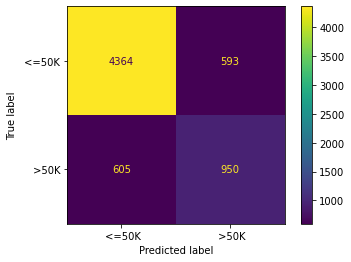

In [16]:
rotulos_previstos = modelo_ad.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_ad)

### KNN

> Acurácia: 0.8149570024570024

> Precisão: 0.7458302446256486

> Recall: 0.7306018252145299

####Treino

In [17]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(atributos_treino, rotulos_treino)

KNeighborsClassifier(n_neighbors=3)

####Validação

Acurácia: 0.8149570024570024
Precisão: 0.7458302446256486
Recall: 0.7306018252145299
Matriz de Confusão: 


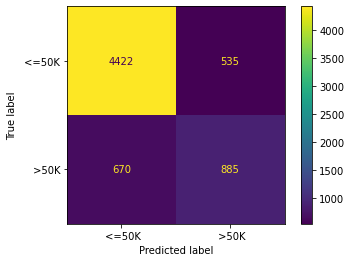

In [18]:
rotulos_previstos = modelo_knn.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_knn)

### Naive Bayes

> Acurácia: 0.44364250614250617

> Precisão: 0.6318518359350034

> Recall: 0.6241854222843788

#### Treino

In [19]:
modelo_nb = GaussianNB()
modelo_nb.fit(atributos_treino, rotulos_treino)

GaussianNB()

####Validação

Acurácia: 0.44364250614250617
Precisão: 0.6318518359350034
Recall: 0.6241854222843788
Matriz de Confusão: 


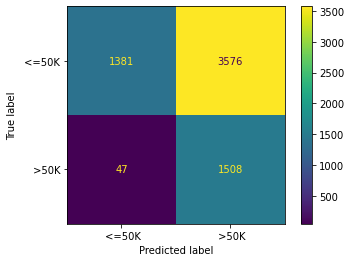

In [20]:
rotulos_previstos = modelo_nb.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_nb)

### Random Forest

> Acurácia: 0.855036855036855

> Precisão: 0.8092037597005

> Recall: 0.7741409562754156


####Treino

In [21]:
modelo_rf = RandomForestClassifier(n_estimators=50, random_state=0)
modelo_rf.fit(atributos_treino, rotulos_treino)

RandomForestClassifier(n_estimators=50, random_state=0)

####Validação

Acurácia: 0.855036855036855
Precisão: 0.8092037597005
Recall: 0.7741409562754156
Matriz de Confusão: 


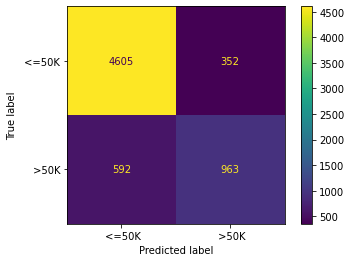

In [22]:
rotulos_previstos = modelo_rf.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_rf)

### Regressão Logística

> Acurácia: 0.8511977886977887

> Precisão: 0.8064419798068774

> Recall: 0.7621302039987623

####Treino

In [23]:
modelo_rl = LogisticRegression(random_state=0)
modelo_rl.fit(atributos_treino, rotulos_treino)

LogisticRegression(random_state=0)

####Validação

Acurácia: 0.8511977886977887
Precisão: 0.8064419798068774
Recall: 0.7621302039987623
Matriz de Confusão: 


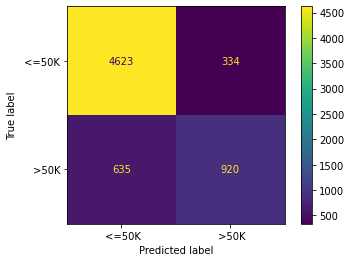

In [24]:
rotulos_previstos = modelo_rl.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_rl)

### SVM

> Acurácia: 0.8493550368550369

> Precisão: 0.806323483724736

> Recall: 0.7542995160307908

####Treino

In [25]:
modelo_svm = SVC(kernel='linear', random_state=0)
modelo_svm.fit(atributos_treino, rotulos_treino)

SVC(kernel='linear', random_state=0)

####Validação

Acurácia: 0.8493550368550369
Precisão: 0.806323483724736
Recall: 0.7542995160307908
Matriz de Confusão: 


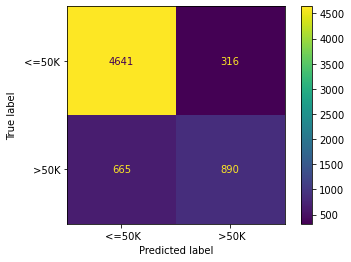

In [26]:
rotulos_previstos = modelo_svm.predict(atributos_validacao)

avaliacao(rotulos_validacao, rotulos_previstos, modelo_svm)

## Modelo Escolhido: Random Forest, pois tem as maiores métricas. 

# Fase de Teste

## Carregando a base de teste

In [27]:
df_teste = pd.read_csv('wage_test.csv')
df_teste = df_teste.drop(columns=['Unnamed: 0'])
df_teste

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


## Tratamento da Base

In [28]:
df_teste = df_teste.iloc[:, 0:14].values

In [29]:
#LabelEncoder
df_teste[:, 1] = label_enconder_workclass.transform(df_teste[:, 1])
df_teste[:, 3] = label_enconder_education.transform(df_teste[:, 3])
df_teste[:, 5] = label_enconder_marital_status.transform(df_teste[:, 5])
df_teste[:, 6] = label_enconder_occupation.transform(df_teste[:, 6])
df_teste[:, 7] = label_enconder_relationship.transform(df_teste[:, 7])
df_teste[:, 8] = label_enconder_race.transform(df_teste[:, 8])
df_teste[:, 9] = label_enconder_sex.transform(df_teste[:, 9])
df_teste[:, 13] = label_enconder_native_country.transform(df_teste[:, 13])

In [30]:
#OneHotEncoder
df_teste = onehotenconder.transform(df_teste).toarray()

In [31]:
#Escalonamento
df_teste = standardscaler.transform(df_teste)

## Teste

In [32]:
rotulos_previstos_teste = modelo_rf.predict(df_teste)

## Salvando resultados

In [33]:
index = np.array(range(0, len(rotulos_previstos_teste)))
pred = np.transpose(np.array([index, rotulos_previstos_teste]))

In [34]:
predicted_csv = pd.DataFrame(pred, columns = ['rowNumber','predictedValues'])
predicted_csv

,rowNumber,predictedValues
0,0,<=50K
1,1,>50K
2,2,>50K
3,3,<=50K
4,4,<=50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,>50K
16278,16278,<=50K


In [35]:
predicted_csv.to_csv("predicted.csv", index=False)